In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.callbacks import EarlyStopping , TensorBoard

from datetime import datetime

In [22]:
df = pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [24]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

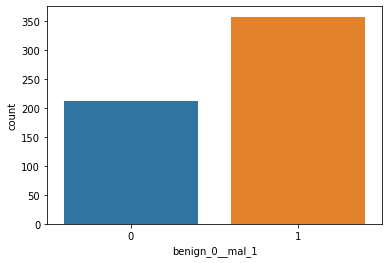

In [25]:
sns.countplot(x = 'benign_0__mal_1' , data = df)

In [26]:
df['benign_0__mal_1'].value_counts()

1    357
0    212
Name: benign_0__mal_1, dtype: int64

In [27]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.25 , random_state = 101)

In [29]:
X_test

array([[1.236e+01, 1.854e+01, 7.901e+01, ..., 8.442e-02, 2.983e-01,
        7.185e-02],
       [1.404e+01, 1.598e+01, 8.978e+01, ..., 7.453e-02, 2.725e-01,
        7.234e-02],
       [1.291e+01, 1.633e+01, 8.253e+01, ..., 8.235e-02, 3.024e-01,
        6.949e-02],
       ...,
       [1.760e+01, 2.333e+01, 1.190e+02, ..., 1.996e-01, 2.301e-01,
        1.224e-01],
       [1.162e+01, 1.818e+01, 7.638e+01, ..., 1.416e-01, 2.660e-01,
        9.270e-02],
       [1.550e+01, 2.108e+01, 1.029e+02, ..., 2.134e-01, 3.003e-01,
        1.048e-01]])

In [30]:
scaler = MinMaxScaler()

In [31]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [32]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
early_stop = EarlyStopping(monitor = 'val_loss' , mode = 'min' , verbose = 1 , patience = 25)

In [34]:
early_stop

In [35]:
datetime.now().strftime("%Y-%m-%d--%H%M")

'2020-04-14--2143'

In [36]:
pwd

'C:\\Users\\Mahmudur Limon\\Downloads\\data\\Deep Learning\\ANN'

In [37]:
log_directory = 'logs\\fit'

board = TensorBoard(log_dir = log_directory , histogram_freq = 1,
        write_graph = True,
        write_images = True,
        update_freq = 'epoch',
        profile_batch = 2,
        embeddings_freq = 1
        )

In [38]:
log_directory

'logs\\fit'

In [39]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [40]:
model.fit(x = X_train, 
          y = y_train, 
          epochs = 600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop , board]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.7541 - val_loss: 0.7111
Epoch 2/600
426/426 [==============================] - 0s 467us/sample - loss: 0.7053 - val_loss: 0.6898
Epoch 3/600
426/426 [==============================] - 0s 443us/sample - loss: 0.6870 - val_loss: 0.6705
Epoch 4/600
426/426 [==============================] - 0s 496us/sample - loss: 0.6821 - val_loss: 0.6506
Epoch 5/600
426/426 [==============================] - 0s 445us/sample - loss: 0.6535 - val_loss: 0.6269
Epoch 6/600
426/426 [==============================] - 0s 480us/sample - loss: 0.6358 - val_loss: 0.6037
Epoch 7/600
426/426 [==============================] - 0s 400us/sample - loss: 0.6105 - val_loss: 0.5777
Epoch 8/600
426/426 [==============================] - 0s 593us/sample - loss: 0.5867 - val_loss: 0.5477
Epoch 9/600
426/426 [==============================] - 0s 415us/sample - loss: 0.5730 - val_loss: 0.5195
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 588us/sample - loss: 0.1337 - val_loss: 0.1085
Epoch 79/600
426/426 [==============================] - 0s 489us/sample - loss: 0.1664 - val_loss: 0.0897
Epoch 80/600
426/426 [==============================] - 0s 522us/sample - loss: 0.1291 - val_loss: 0.0969
Epoch 81/600
426/426 [==============================] - 0s 469us/sample - loss: 0.1423 - val_loss: 0.1049
Epoch 82/600
426/426 [==============================] - 0s 561us/sample - loss: 0.1452 - val_loss: 0.0961
Epoch 83/600
426/426 [==============================] - 0s 543us/sample - loss: 0.1525 - val_loss: 0.0957
Epoch 84/600
426/426 [==============================] - 0s 509us/sample - loss: 0.1293 - val_loss: 0.0987
Epoch 85/600
426/426 [==============================] - 0s 530us/sample - loss: 0.1185 - val_loss: 0.0952
Epoch 86/600
426/426 [==============================] - 0s 538us/sample - loss: 0.1255 - val_loss: 0.0999
Epoch 87/600
426/426 [========================

In [42]:
print(log_directory)

logs\fit
